In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf


In [2]:
stock_data = yf.download('AAPL', start='2010-01-01', end='2023-12-31')
#stock_data = stock_data[['Close']]
#stock_data.dropna(inplace=True)  # Ensure no NaN values


[*********************100%%**********************]  1 of 1 completed


In [3]:
# Display the first few rows of the data
print(stock_data.head())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454505  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465664  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362820  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351057  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393281  447610800


In [4]:
# Check for missing values
stock_data.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
# Display basic information
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3522 non-null   float64
 1   High       3522 non-null   float64
 2   Low        3522 non-null   float64
 3   Close      3522 non-null   float64
 4   Adj Close  3522 non-null   float64
 5   Volume     3522 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 192.6 KB


In [6]:
# Summary statistics
print(stock_data.describe())


              Open         High          Low        Close    Adj Close  \
count  3522.000000  3522.000000  3522.000000  3522.000000  3522.000000   
mean     59.883701    60.528731    59.267621    59.926226    57.701397   
std      55.387520    56.014467    54.812449    55.444533    55.642305   
min       6.870357     7.000000     6.794643     6.858929     5.792196   
25%      19.680447    19.832321    19.402321    19.608571    16.986196   
50%      32.303749    32.633751    32.078751    32.340000    29.103409   
75%      91.213125    92.512501    90.425623    91.207499    88.971653   
max     198.020004   199.619995   197.000000   198.110001   197.361084   

             Volume  
count  3.522000e+03  
mean   2.422834e+08  
std    2.204578e+08  
min    2.404830e+07  
25%    9.266760e+07  
50%    1.526602e+08  
75%    3.284715e+08  
max    1.880998e+09  


In [7]:
stock_data = stock_data[['Close']]
stock_data.dropna(inplace=True)  # Ensure no NaN values



C:\Users\HP\AppData\Local\Temp\ipykernel_27536\3873303062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.dropna(inplace=True)  # Ensure no NaN values


# ADF Test for staionarity

In [8]:
result = adfuller(stock_data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')



ADF Statistic: 0.819870920445012
p-value: 0.9919502443702507


step to remove stationarity

In [9]:
stock_data['Log_Close'] = np.log(stock_data['Close'])
stock_data['Log_Close_Diff'] = stock_data['Log_Close'].diff().dropna()
# Dropping the first NaN value after differencing
#df = stock_data.dropna()



C:\Users\HP\AppData\Local\Temp\ipykernel_27536\3187649801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Log_Close'] = np.log(stock_data['Close'])
C:\Users\HP\AppData\Local\Temp\ipykernel_27536\3187649801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Log_Close_Diff'] = stock_data['Log_Close'].diff().dropna()


# EDA

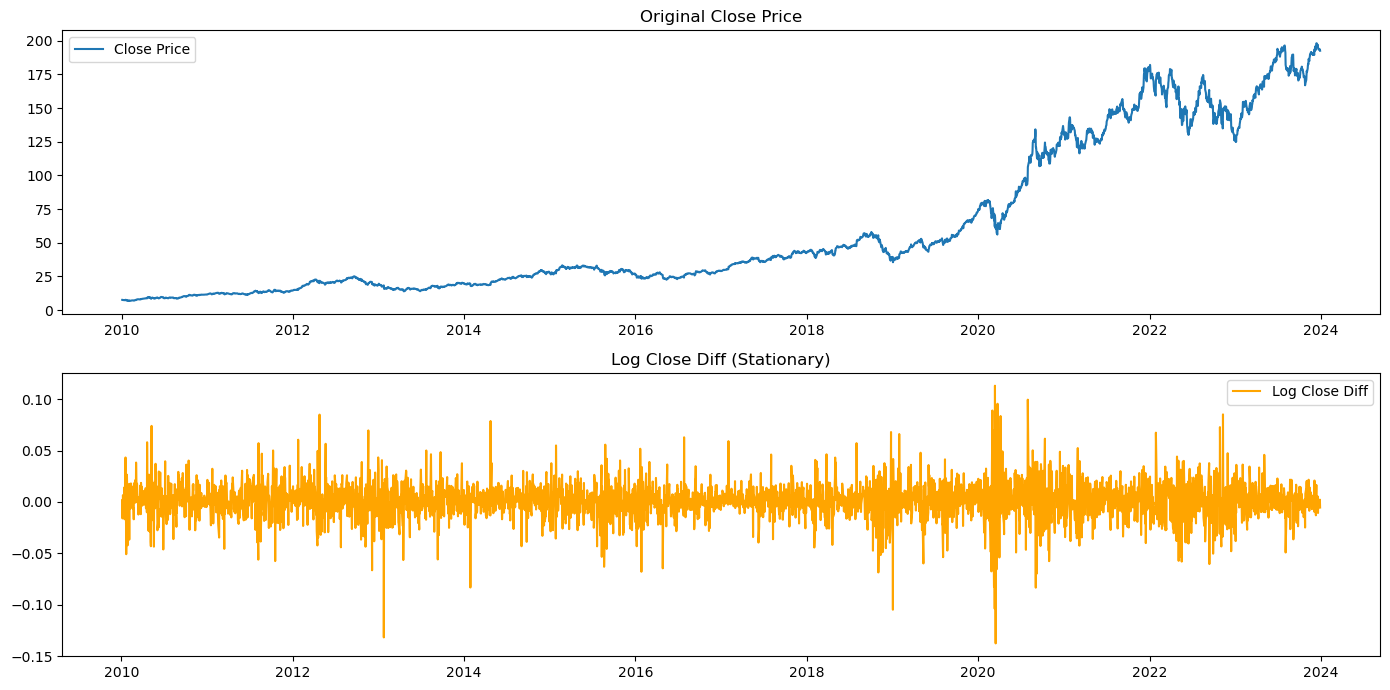

In [10]:
# Plot the original and transformed data
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(stock_data['Close'], label='Close Price')
plt.title('Original Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(stock_data['Log_Close_Diff'], label='Log Close Diff', color='orange')
plt.title('Log Close Diff (Stationary)')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
stock_data['Log_Close_Diff'] = stock_data['Log_Close'].diff().dropna()
result = adfuller(stock_data['Log_Close_Diff'].dropna())  # Drop NaNs again before ADF test
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')




ADF Statistic: -12.258212087867884
p-value: 9.206049807272455e-23


C:\Users\HP\AppData\Local\Temp\ipykernel_27536\536063628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Log_Close_Diff'] = stock_data['Log_Close'].diff().dropna()


In [12]:
stock_data

,Close,Log_Close,Log_Close_Diff
Date,,,
2010-01-04,7.643214,2.033818,NaN
2010-01-05,7.656429,2.035546,0.001727
2010-01-06,7.534643,2.019511,-0.016034
2010-01-07,7.520714,2.017661,-0.001850
2010-01-08,7.570714,2.024287,0.006626
...,...,...,...
2023-12-22,193.600006,5.265794,-0.005563
2023-12-26,193.050003,5.262949,-0.002845
2023-12-27,193.149994,5.263467,0.000518


In [13]:
stock_data


,Close,Log_Close,Log_Close_Diff
Date,,,
2010-01-04,7.643214,2.033818,NaN
2010-01-05,7.656429,2.035546,0.001727
2010-01-06,7.534643,2.019511,-0.016034
2010-01-07,7.520714,2.017661,-0.001850
2010-01-08,7.570714,2.024287,0.006626
...,...,...,...
2023-12-22,193.600006,5.265794,-0.005563
2023-12-26,193.050003,5.262949,-0.002845
2023-12-27,193.149994,5.263467,0.000518


# ARIMA MODEL

In [14]:
from pmdarima import auto_arima

arima_model = auto_arima(stock_data['Log_Close_Diff'].dropna(), seasonal=False)
print(arima_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3521
Model:               SARIMAX(1, 0, 0)   Log Likelihood                9195.374
Date:                Tue, 20 Aug 2024   AIC                         -18384.748
Time:                        15:46:04   BIC                         -18366.249
Sample:                             0   HQIC                        -18378.148
                               - 3521                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.000      3.153      0.002       0.000       0.002
ar.L1         -0.0429      0.011     -3.823      0.000      -0.065      -0.021
sigma2         0.0003   4.22e-06     74.816      0.0

In [15]:
train_data, test_data = train_test_split(stock_data['Log_Close_Diff'].dropna(), test_size=0.2, shuffle=False)
arima_model.fit(train_data)
forecast = arima_model.predict(n_periods=len(test_data))



C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [16]:
forecast

2816    0.001425
2817    0.000957
2818    0.000981
2819    0.000980
2820    0.000980
          ...   
3516    0.000980
3517    0.000980
3518    0.000980
3519    0.000980
3520    0.000980
Length: 705, dtype: float64

# SARIMA MODEL

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=len(test_data))


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# LSTM MODEL

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2768/2768 ━━━━━━━━━━━━━━━━━━━━ 67s 22ms/step - loss: 9.2255e-04
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


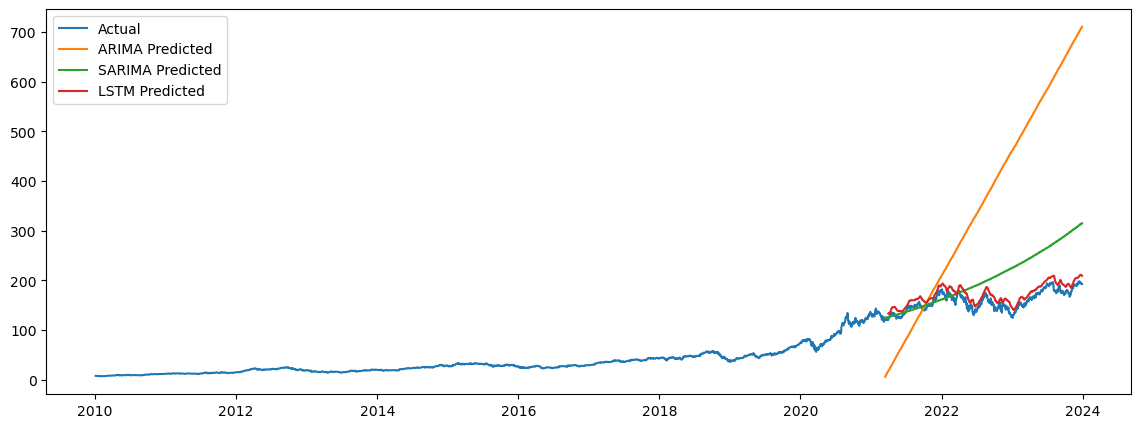

In [19]:
plt.figure(figsize=(14,5))
plt.plot(stock_data['Close'], label='Actual')
plt.plot(stock_data.index[-len(forecast):], np.exp(forecast).cumsum() + stock_data['Log_Close'].iloc[-len(forecast)], label='ARIMA Predicted')
plt.plot(stock_data.index[-len(sarima_forecast):], np.exp(sarima_forecast.cumsum() + stock_data['Log_Close'].iloc[-len(sarima_forecast)]), label='SARIMA Predicted')
plt.plot(stock_data.index[-len(predictions):], predictions, label='LSTM Predicted')
plt.legend()
plt.show()


In [20]:
from sklearn.metrics import mean_squared_error

arima_rmse = np.sqrt(mean_squared_error(np.exp(test_data.cumsum() + stock_data['Log_Close'].iloc[-len(test_data)]), np.exp(forecast.cumsum() + stock_data['Log_Close'].iloc[-len(forecast)])))
sarima_rmse = np.sqrt(mean_squared_error(np.exp(test_data.cumsum() + stock_data['Log_Close'].iloc[-len(test_data)]), np.exp(sarima_forecast.cumsum() + stock_data['Log_Close'].iloc[-len(sarima_forecast)])))
lstm_rmse = np.sqrt(mean_squared_error(stock_data['Close'][-len(predictions):], predictions))

print(f'ARIMA RMSE: {arima_rmse}')
print(f'SARIMA RMSE: {sarima_rmse}')
print(f'LSTM RMSE: {lstm_rmse}')


ARIMA RMSE: 31.527377957735016
SARIMA RMSE: 60.8473270723872
LSTM RMSE: 14.292347214189085


# RESIDUAL ANALYSIS

In [21]:
# Fit an AutoARIMA model
auto_arima_model = auto_arima(stock_data['Log_Close_Diff'].dropna(), seasonal=False, trace=True)
model = auto_arima_model.fit(stock_data['Log_Close_Diff'].dropna())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-18371.300, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-18372.915, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-18376.599, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-18376.566, Time=0.40 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-18374.631, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-18374.711, Time=0.54 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-18372.618, Time=0.81 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-18384.748, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-18380.253, Time=0.70 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-18382.748, Time=1.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-18382.753, Time=0.71 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-18384.748, Time=0.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-18380.747, Time=1.58 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 8.816 seco

In [22]:
# Extract the residuals
residuals = model.resid()

In [23]:
# Check if residuals are non-zero
print("Residuals: ", residuals.describe())

Residuals:  count    3521.000000
mean        0.000001
std         0.017768
min        -0.133804
25%        -0.008278
50%        -0.000069
75%         0.009611
max         0.107739
dtype: float64


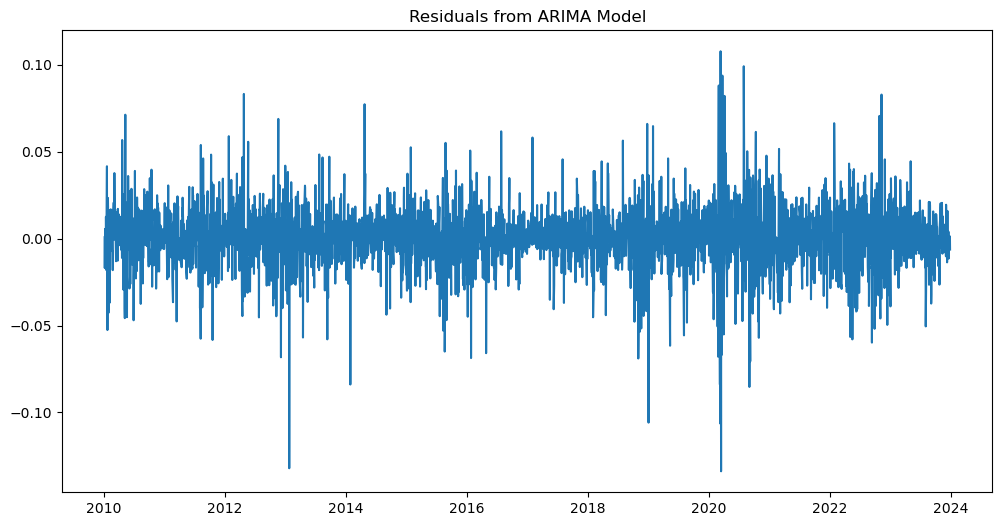

In [24]:
# Plotting Residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


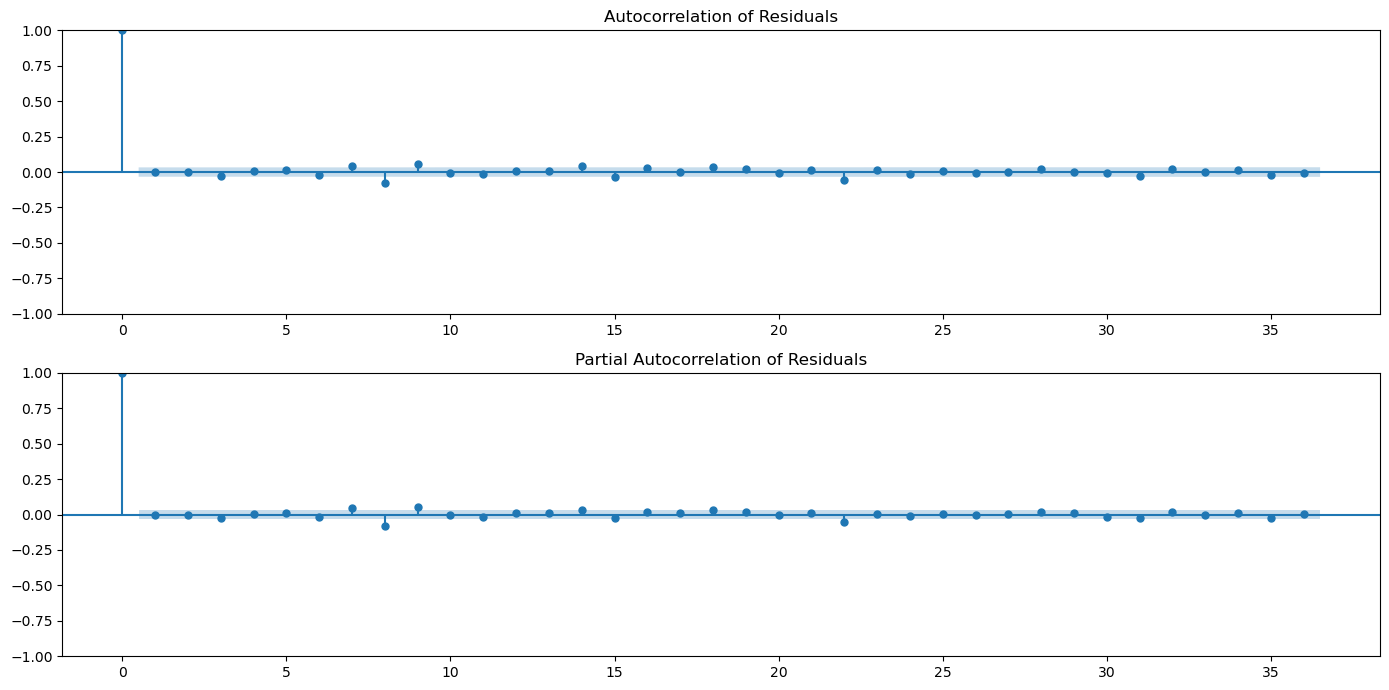

In [25]:
# Autocorrelation Plot
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plot_acf(residuals, ax=plt.gca())
plt.title('Autocorrelation of Residuals')

plt.subplot(2, 1, 2)
plot_pacf(residuals, ax=plt.gca())
plt.title('Partial Autocorrelation of Residuals')

plt.tight_layout()
plt.show()


In [26]:
import statsmodels.api as sm


In [27]:
# Diagnose with Ljung-Box test
ljung_box_results = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_results)


      lb_stat  lb_pvalue
10  44.077985   0.000003


In [28]:
sarima_model = SARIMAX(stock_data['Log_Close'], 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 12), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [29]:
# Residuals from SARIMA model
sarima_residuals = sarima_results.resid

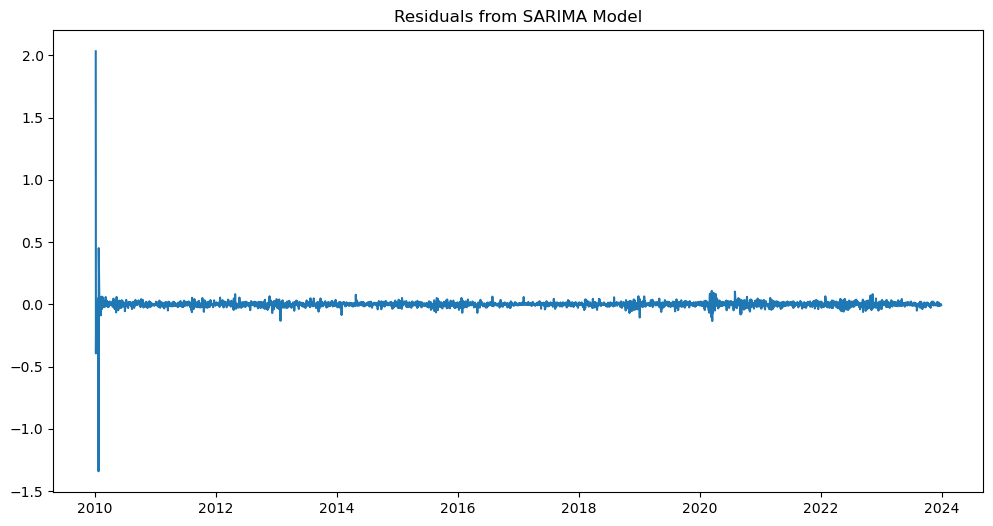

In [30]:
# Plotting Residuals for SARIMA
plt.figure(figsize=(12, 6))
plt.plot(sarima_residuals)
plt.title('Residuals from SARIMA Model')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


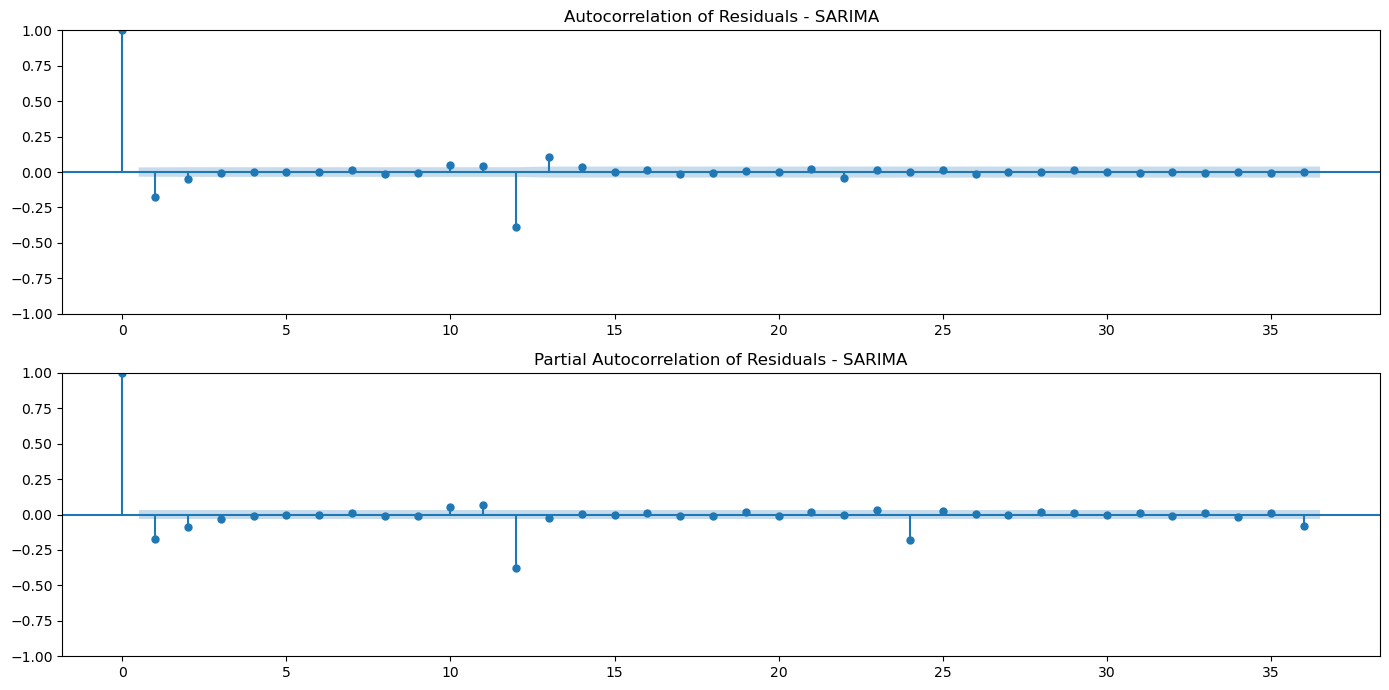

In [31]:
# Autocorrelation Plot for SARIMA
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plot_acf(sarima_residuals.dropna(), ax=plt.gca())
plt.title('Autocorrelation of Residuals - SARIMA')

plt.subplot(2, 1, 2)
plot_pacf(sarima_residuals.dropna(), ax=plt.gca())
plt.title('Partial Autocorrelation of Residuals - SARIMA')

plt.tight_layout()
plt.show()

In [32]:
# Ljung-Box Test for SARIMA residuals
ljung_box_results_sarima = sm.stats.acorr_ljungbox(sarima_residuals.dropna(), lags=[10], return_df=True)
print("SARIMA Ljung-Box Test Results:\n", ljung_box_results_sarima)

SARIMA Ljung-Box Test Results:
        lb_stat     lb_pvalue
10  129.234007  6.693658e-23


In [33]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scaling the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X, Y = create_dataset(scaled_data, time_step)

# Reshape data to 3D for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X, Y, epochs=10, batch_size=32, verbose=1)

# Predicting and getting the residuals
train_predict = lstm_model.predict(X)
train_predict = scaler.inverse_transform(train_predict)


Epoch 1/10


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 0.0177
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 0.0021
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.0015
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.0015
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0012
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.0011
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 9.9768e-04
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 0.0012
Epoch 9/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 8.8690e-04
Epoch 10/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 9.0374e-04
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step


In [34]:
# Calculate residuals
lstm_residuals = stock_data['Close'][time_step+1:] - train_predict.flatten()


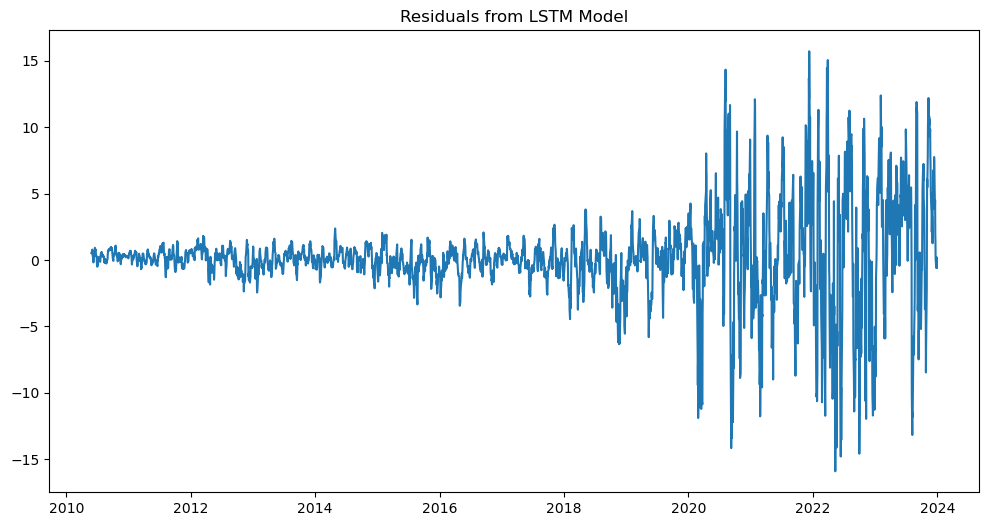

In [35]:
# Plotting Residuals for LSTM
plt.figure(figsize=(12, 6))
plt.plot(lstm_residuals)
plt.title('Residuals from LSTM Model')
plt.show()



C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


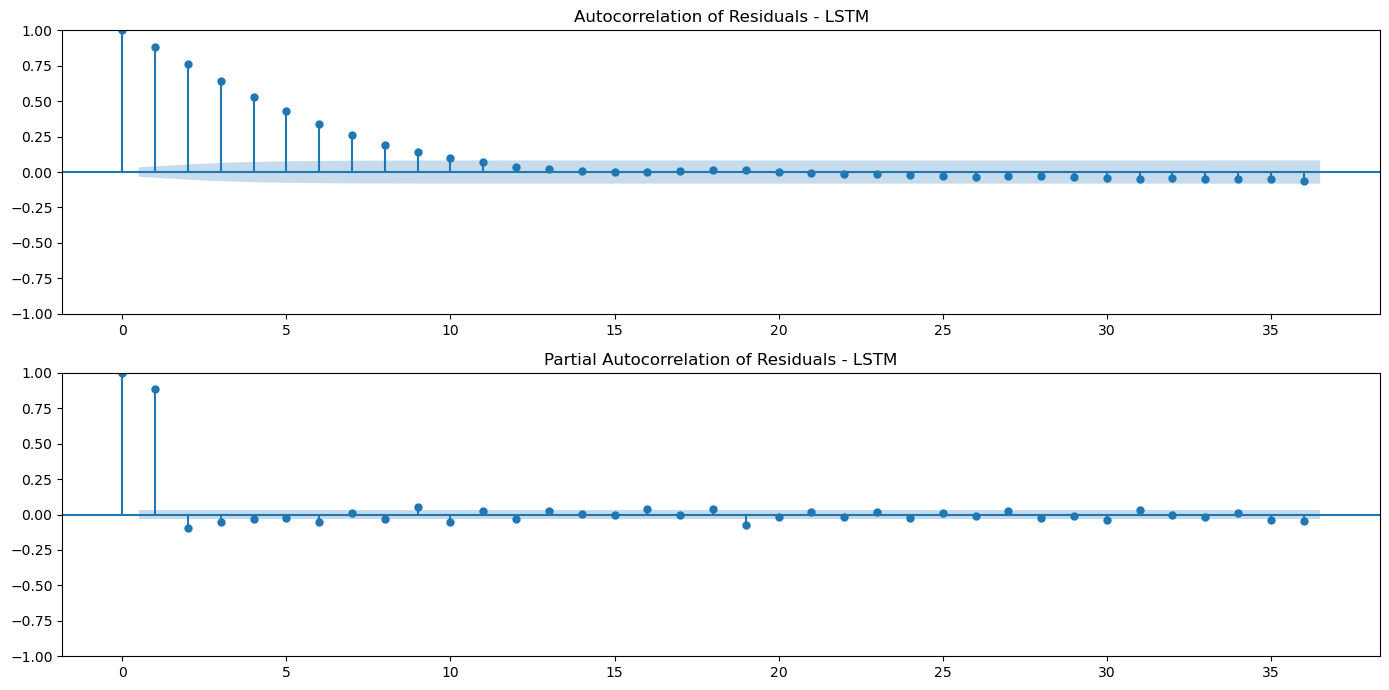

In [36]:
# Autocorrelation Plot for LSTM
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plot_acf(lstm_residuals, ax=plt.gca())
plt.title('Autocorrelation of Residuals - LSTM')

plt.subplot(2, 1, 2)
plot_pacf(lstm_residuals, ax=plt.gca())
plt.title('Partial Autocorrelation of Residuals - LSTM')

plt.tight_layout()
plt.show()

In [37]:
# Ljung-Box Test for LSTM residuals
ljung_box_results_lstm = sm.stats.acorr_ljungbox(lstm_residuals, lags=[10], return_df=True)
print("LSTM Ljung-Box Test Results:\n", ljung_box_results_lstm)

LSTM Ljung-Box Test Results:
         lb_stat  lb_pvalue
10  8508.973491        0.0
